In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [67]:
df2 = pd.read_csv("/content/diabetes_data_upload.csv")

# **Diabetes Data Upload**


In [4]:
df2

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [23]:
df2.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [25]:
df2.nunique()

,0
Age,51
Gender,2
Polyuria,2
Polydipsia,2
sudden weight loss,2
weakness,2
Polyphagia,2
Genital thrush,2
visual blurring,2
Itching,2


In [42]:
symptom_cols = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

In [43]:
for col in symptom_cols:
    df2[col] = df2[col].replace({'No': 0, 'Yes': 1}).astype(int)

In [44]:
pd.set_option('future.no_silent_downcasting', True)

In [45]:
df2['Gender'] = df2['Gender'].replace({'Male': 0, 'Female': 1}).astype(int)
df2['class'] = df2['class'].replace({'Negative': 0, 'Positive': 1}).astype(int)

In [46]:
x = df2.drop('class', axis=1)
y = df2['class']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [48]:
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])

In [49]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [50]:
dt1 = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
dt2 = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
dt3 = DecisionTreeClassifier(max_depth=None, criterion='gini', random_state=42)
dt4 = DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=42)

In [63]:
dt1_acc = evaluate_model(dt1, X_train, y_train, X_test, y_test)
dt2_acc = evaluate_model(dt2, X_train, y_train, X_test, y_test)
dt3_acc = evaluate_model(dt3, X_train, y_train, X_test, y_test)
dt4_acc = evaluate_model(dt4, X_train, y_train, X_test, y_test)

In [65]:
print("Decision Tree Results:")
print("max_depth=3, criterion='gini':", dt1_acc)
print("max_depth=5, criterion='entropy':", dt2_acc)
print("max_depth=None, criterion='gini':", dt3_acc)
print("max_depth=None, criterion='entropy':", dt4_acc)

Decision Tree Results:
max_depth=3, criterion='gini': 0.8974358974358975
max_depth=5, criterion='entropy': 0.9615384615384616
max_depth=None, criterion='gini': 0.967948717948718
max_depth=None, criterion='entropy': 0.9807692307692307


In [52]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=3, criterion='gini', random_state=42)
rf2 = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='entropy', random_state=42)
rf3 = RandomForestClassifier(n_estimators=200, max_depth=None, criterion='gini', random_state=42)
rf4 = RandomForestClassifier(n_estimators=200, max_depth=None, criterion='entropy', random_state=42)

In [59]:
rf1_acc = evaluate_model(rf1, X_train, y_train, X_test, y_test)
rf2_acc = evaluate_model(rf2, X_train, y_train, X_test, y_test)
rf3_acc = evaluate_model(rf3, X_train, y_train, X_test, y_test)
rf4_acc = evaluate_model(rf4, X_train, y_train, X_test, y_test)

In [60]:
print("\nRandom Forest Results:")
print("n_estimators=50, max_depth=3, criterion='gini':", rf1_acc)
print("n_estimators=100, max_depth=5, criterion='entropy':", rf2_acc)
print("n_estimators=200, max_depth=None, criterion='gini':", rf3_acc)
print("n_estimators=200, max_depth=None, criterion='entropy':", rf4_acc)


Random Forest Results:
n_estimators=50, max_depth=3, criterion='gini': 0.9166666666666666
n_estimators=100, max_depth=5, criterion='entropy': 0.9615384615384616
n_estimators=200, max_depth=None, criterion='gini': 0.9935897435897436
n_estimators=200, max_depth=None, criterion='entropy': 0.9935897435897436


In [54]:
nb1 = GaussianNB(var_smoothing=0.0000000001)
nb2 = GaussianNB(var_smoothing=0.00000001)
nb3 = GaussianNB(var_smoothing=0.000001)
nb4 = GaussianNB(var_smoothing=0.01)

In [61]:
nb1_acc = evaluate_model(nb1, X_train, y_train, X_test, y_test)
nb2_acc = evaluate_model(nb2, X_train, y_train, X_test, y_test)
nb3_acc = evaluate_model(nb3, X_train, y_train, X_test, y_test)
nb4_acc = evaluate_model(nb4, X_train, y_train, X_test, y_test)

In [62]:
print("\nNaive Bayes Results:")
print("var_smoothing=0.0000000001:", nb1_acc)
print("var_smoothing=0.00000001:", nb2_acc)
print("var_smoothing=0.000001:", nb3_acc)
print("var_smoothing=0.01:", nb4_acc)


Naive Bayes Results:
var_smoothing=0.0000000001: 0.9102564102564102
var_smoothing=0.00000001: 0.9102564102564102
var_smoothing=0.000001: 0.9102564102564102
var_smoothing=0.01: 0.9166666666666666


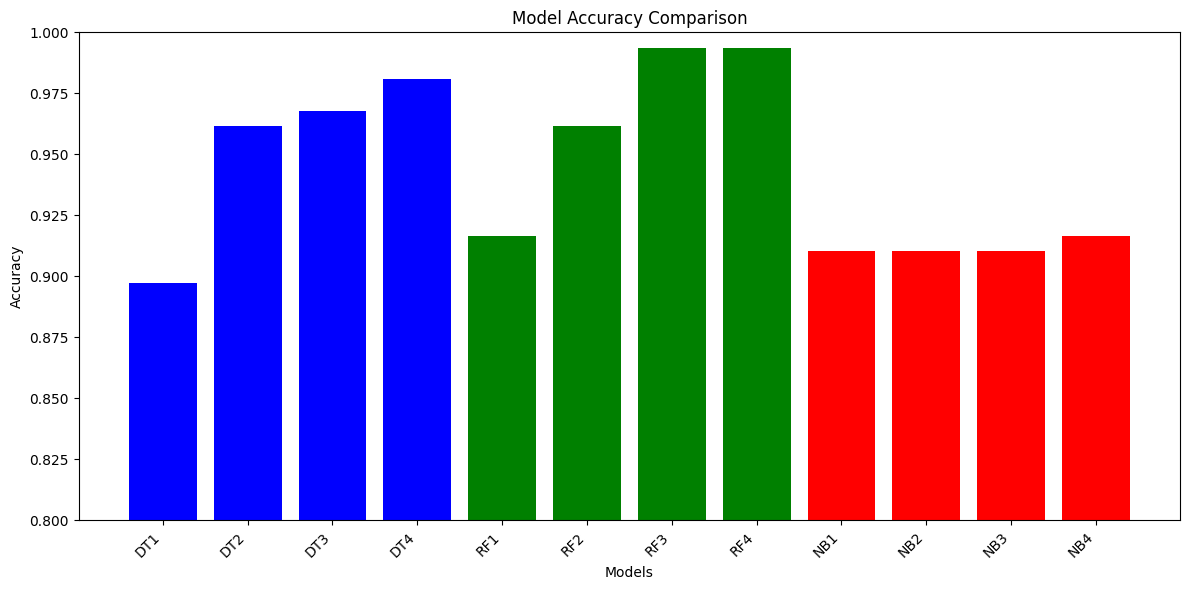

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and accuracies
model_names = ['DT1', 'DT2', 'DT3', 'DT4', 'RF1', 'RF2', 'RF3', 'RF4', 'NB1', 'NB2', 'NB3', 'NB4']
accuracies = [dt1_acc, dt2_acc, dt3_acc, dt4_acc, rf1_acc, rf2_acc, rf3_acc, rf4_acc, nb1_acc, nb2_acc, nb3_acc, nb4_acc]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color=['blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()